In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [242]:
site = "Storelva"  # Malselva or Storelva

start_date_dict = {"Malselva": "2018-01-01",
                   "Storelva": "2017-01-01"}  # Tho have data from 2016

# Read in data

## Read in sensor data

In [243]:
fpath = r'../data/sensor_%s.csv' % site

sensor_df_hourly = pd.read_csv(fpath, index_col=1, parse_dates=True, na_values="NA")
sensor_df_hourly = sensor_df_hourly.drop('station_name', axis=1)
sensor_df_hourly.columns = ["FDOM", "Conductivity", "pH", "T_water", "Turbidity"]
sensor_df_hourly.dropna(how="all", axis=0, inplace=True)
sensor_df_hourly

,FDOM,Conductivity,pH,T_water,Turbidity
datetime,,,,,
2015-02-26 12:42:00+00:00,69.279049,4.046,6.23,1.35,1.54
2015-02-26 13:42:00+00:00,69.591887,4.046,6.23,1.40,1.53
2015-02-26 14:42:00+00:00,69.539249,4.056,6.23,1.39,1.52
2015-02-26 15:42:00+00:00,69.614022,4.041,6.22,1.39,1.50
2015-02-26 16:42:00+00:00,69.757939,4.039,6.22,1.37,1.50
...,...,...,...,...,...
2021-12-31 19:46:00+00:00,71.662322,4.012,6.25,2.39,1.13
2021-12-31 20:46:00+00:00,71.688667,4.028,6.25,2.34,1.12
2021-12-31 21:46:00+00:00,71.798334,3.981,6.25,2.34,1.08


In [244]:
# Round sensor data timestamp to the nearest hour, for joining with Q and grab sample data
sensor_df_hourly.index = sensor_df_hourly.index.round(freq='H')
sensor_df_hourly.sort_index(inplace=True)  # Not sure it was sorted; do in case
sensor_df_hourly.head(2)

,FDOM,Conductivity,pH,T_water,Turbidity
datetime,,,,,
2015-02-26 13:00:00+00:00,69.279049,4.046,6.23,1.35,1.54
2015-02-26 14:00:00+00:00,69.591887,4.046,6.23,1.40,1.53


In [245]:
# Resample to daily

sensor_df = sensor_df_hourly.resample('D').mean()
# Drop time info for joining and plotting
sensor_df.index = sensor_df.index.date
sensor_df

,FDOM,Conductivity,pH,T_water,Turbidity
2015-02-26,69.565192,4.114818,6.225455,1.399091,1.491818
2015-02-27,67.109706,4.129000,6.220417,1.473750,3.201667
2015-02-28,68.694219,4.102958,6.214583,1.511250,2.187500
2015-03-01,65.711247,4.173125,6.113846,1.653333,4.472083
2015-03-02,67.238732,4.020375,NaN,1.735833,3.473750
...,...,...,...,...,...
2021-12-28,70.869126,3.970792,6.179167,1.812917,1.186250
2021-12-29,70.697419,3.809958,6.212083,2.006667,1.153333
2021-12-30,71.491542,3.993417,6.242500,2.283333,1.055833
2021-12-31,71.295408,3.962792,6.241250,2.226250,1.138750


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

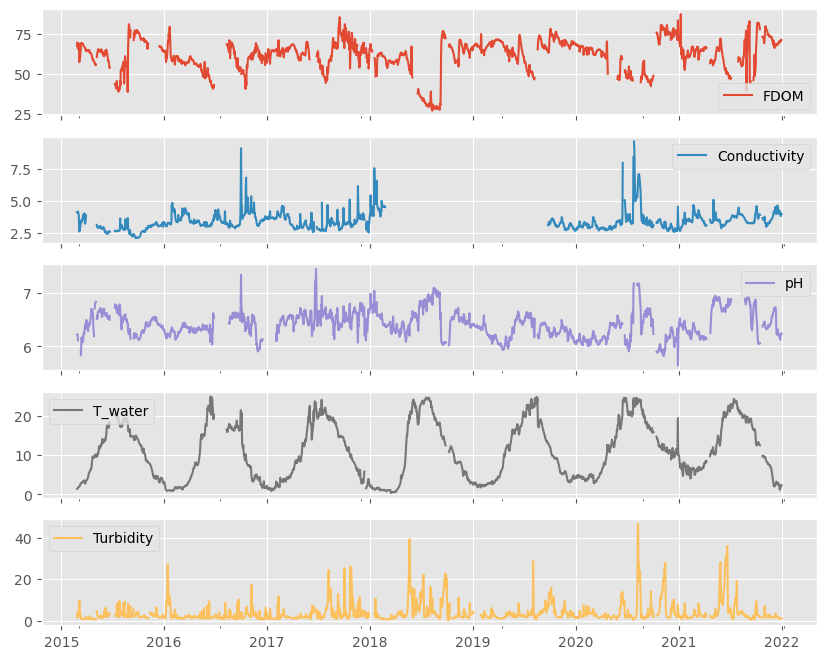

In [246]:
sensor_df.plot(subplots=True, sharex=True, figsize=(10, 8))

## Read in met data

In [247]:
met_fpath = r"../data/Climate_%s_daily.csv" % site
met_df = pd.read_csv(met_fpath, index_col=0, parse_dates=True, dayfirst=False)
met_df = met_df[['par', 'value_mean']]
met_df = met_df.pivot(columns='par')
met_df = met_df.droplevel(level=0, axis=1)
met_df.columns = ['Pptn', 'T_air']
met_df.index = met_df.index.date  # Drop time info
met_df

,Pptn,T_air
2015-01-01,0.0,2.5
2015-01-02,1.3,6.7
2015-01-03,2.1,2.8
2015-01-04,0.4,1.1
2015-01-05,0.0,-0.8
...,...,...
2021-12-27,0.0,-12.3
2021-12-28,1.8,-6.3
2021-12-29,3.3,-4.9
2021-12-30,7.3,-3.8


## Read in discharge data

In [248]:
q_hrly_fpath_dict = {'Malselva': r'../../data/discharge/Q_målselvfossen_alldata_hourly-resolution_downloaded-2022-11.csv',
                     'Storelva': r'../data/Discharge_Storelva_18-4-0_hourly.csv'}

q_hourly_df = pd.read_csv(q_hrly_fpath_dict[site], index_col=0, parse_dates=True)
q_hourly_df.columns = ['Q', 'Korrigert', 'Kontrollert']
q_hourly_df = q_hourly_df['Q']
q_hourly_df.index.name = 'datetime'
q_hourly_df.head()

datetime
2007-11-22 00:00:00+00:00    1.564688
2007-11-22 01:00:00+00:00    1.571511
2007-11-22 02:00:00+00:00    1.582149
2007-11-22 03:00:00+00:00    1.589003
2007-11-22 04:00:00+00:00    1.595874
Name: Q, dtype: float64

In [249]:
q_df = pd.read_csv(r'../data/Discharge_%s.csv' % site, index_col=0, parse_dates=True)

# Drop time info for joining and plotting
q_df.index = q_df.index.date

q_series = q_df['value']
q_series.name = 'Q'
q_series

2015-01-01    5.250791
2015-01-02    5.574467
2015-01-03    5.959798
2015-01-04    5.508568
2015-01-05    5.239527
                ...   
2021-12-26    8.619706
2021-12-27    8.003234
2021-12-28    7.935480
2021-12-29    7.616905
2021-12-30    7.498725
Name: Q, Length: 2556, dtype: float64

**Maeve's Q data is missing the last day of the series. Doesn't matter for now, but in future re-do with raw NVE data**

## Read in grab sample water chem data

In [250]:
chem_df = pd.read_csv(r'../data/waterchem_%s.csv' % site, index_col=1, parse_dates=True)
chem_df.drop(chem_df.columns[0], axis=1, inplace=True)
# Drop rows where there were no samples at all
chem_df.dropna(axis=0, how="all", inplace=True)
chem_df['grab_sample'] = True
# Drop time info for joining and plotting
chem_df.index = chem_df.index.date
chem_df.head()

,pH,Conductivity_mS_m,SPM_mg_L,TOC_mg_L,Turbidity_NTU,PO4_ug_L,TP_ug_L,NO3_ug_L,NH4_ug_L,TN_ug_L,Si_mg_L,Ca_mg_L,DOC_mg_L,PartC_ug_L,PartN_ug_L,TDP_ug_L,grab_sample
2017-02-06,6.29,3.12,1.74,6.0,1.10,2.0,7,200,32.0,430.0,1.68,1.72,5.9,NaN,NaN,2.0,True
2017-03-08,6.36,2.81,1.40,5.8,1.10,NaN,12,200,8.0,440.0,1.62,1.55,5.8,518.0,34.8,2.0,True
2017-04-04,6.35,2.65,1.56,5.8,0.82,1.0,7,250,15.0,400.0,1.55,1.54,5.6,295.0,22.2,3.0,True
2017-05-02,6.40,2.96,2.48,5.8,1.80,3.0,7,250,25.0,440.0,1.36,1.66,5.5,439.0,37.3,2.0,True
2017-06-12,6.52,2.89,2.46,7.3,1.50,5.0,6,100,22.0,400.0,1.20,1.51,7.1,634.0,81.9,3.0,True


# Join and plot data

## Daily: All but grab samples

In [251]:
df_li = [met_df, q_series, sensor_df, chem_df['grab_sample']]
df = pd.concat(df_li, axis=1, sort=True)

# Fill in 0s for days when there weren't grab samples
df.loc[df['grab_sample'] != 1, 'grab_sample'] = False

index = pd.to_datetime(df.index, yearfirst=True)
df.index = index

# Truncate to start on 01/01/2017
start_date = start_date_dict[site]
df = df.loc[start_date:]

df

,Pptn,T_air,Q,FDOM,Conductivity,pH,T_water,Turbidity,grab_sample
2017-01-01,0.0,6.4,5.536927,57.804370,3.618583,NaN,2.090000,2.544167,False
2017-01-02,0.0,0.5,5.414372,62.152466,3.645625,NaN,1.648333,1.110833,False
2017-01-03,0.0,-2.3,5.180399,62.473917,3.648417,NaN,1.436250,1.168333,False
2017-01-04,0.0,2.4,4.959430,62.392462,3.575917,NaN,1.612917,0.985000,False
2017-01-05,0.0,-3.2,4.556522,65.593442,3.777917,NaN,1.277917,1.129583,False
...,...,...,...,...,...,...,...,...,...
2021-12-28,1.8,-6.3,7.935480,70.869126,3.970792,6.179167,1.812917,1.186250,False
2021-12-29,3.3,-4.9,7.616905,70.697419,3.809958,6.212083,2.006667,1.153333,False
2021-12-30,7.3,-3.8,7.498725,71.491542,3.993417,6.242500,2.283333,1.055833,False
2021-12-31,0.0,2.5,NaN,71.295408,3.962792,6.241250,2.226250,1.138750,False


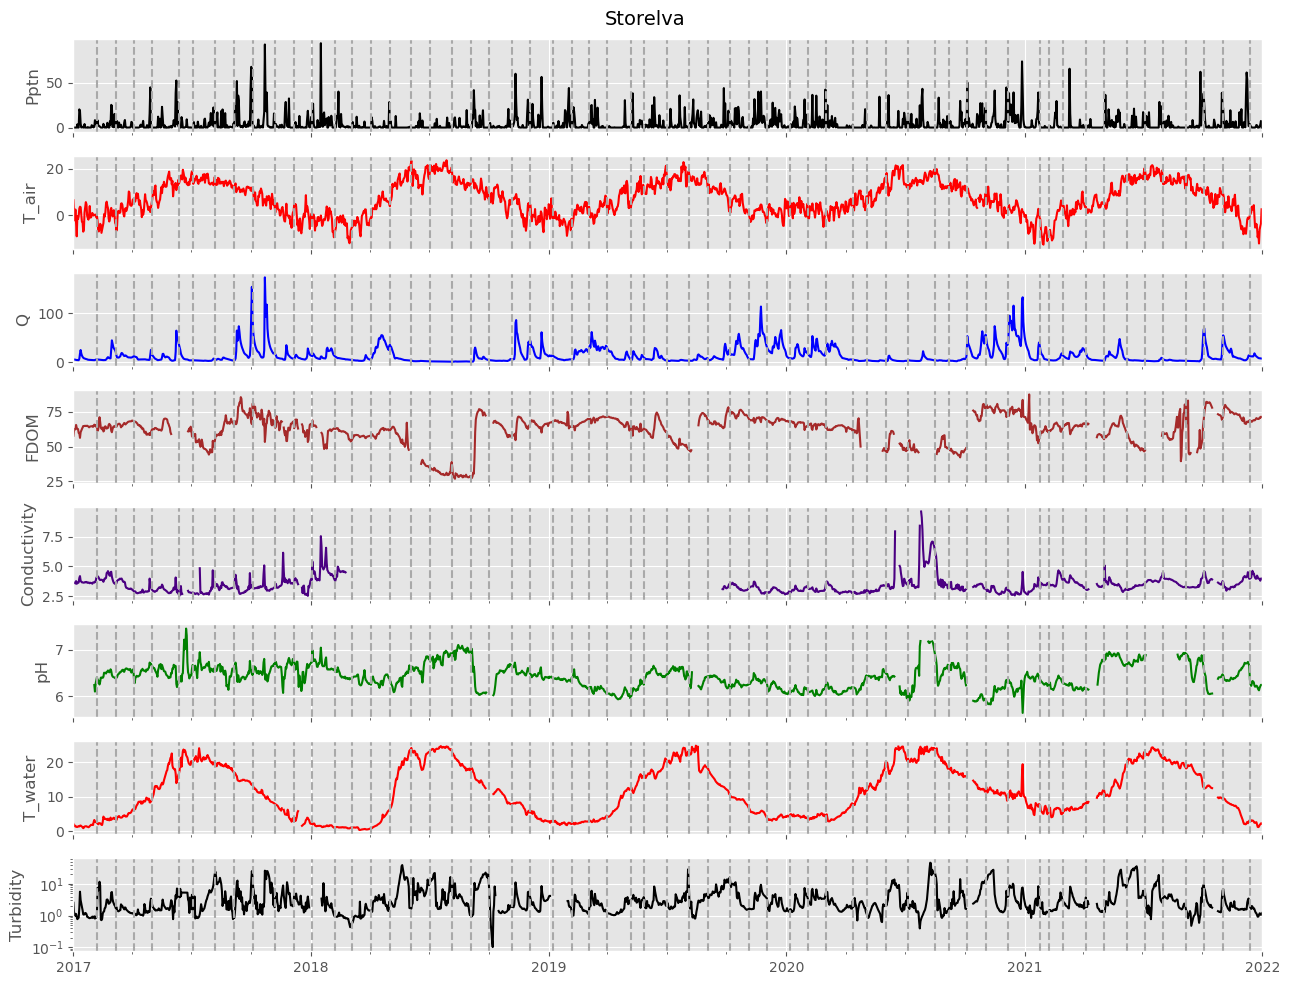

In [252]:
colours = ['black', 'red', 'blue', 'brown', 'indigo', 'green', 'red', 'black']

axs = df.plot(subplots=True, legend=False, figsize=(13, 10), style=colours);
for i, ax in enumerate(axs):
    var = df.columns[i]
    axs[i].set_ylabel(df.columns[i])
    if var=='Turbidity':
        axs[i].set_yscale("log")
    samp_dates = df.loc[df['grab_sample'] == True].index.values
    for date in samp_dates:
        ax.axvline(date, color='darkgray', linestyle='--')

plt.suptitle("%s" %site, size=14);
plt.tight_layout()

plt.savefig(r'../figures/timeseries_all-data_%s.png' %site)

## Hourly discharge and sensor data

In [253]:
df_li = [sensor_df_hourly, q_hourly_df]
df_hourly = pd.concat(df_li, axis=1, sort=True)

# index = pd.to_datetime(df.index, yearfirst=True)
# df.index = index

# Truncate to start on 01/01/2017
start_date = start_date_dict[site]
df = df.loc[start_date:]

# Quick check it's working; select a period when all should have data
df_hourly.loc['2020-01-01':].head()

,FDOM,Conductivity,pH,T_water,Turbidity,Q
datetime,,,,,,
2020-01-01 00:00:00+00:00,67.848614,2.780,6.06,3.69,1.36,15.65984
2020-01-01 01:00:00+00:00,67.820813,2.780,6.07,3.55,1.41,15.50138
2020-01-01 02:00:00+00:00,67.375453,2.780,6.06,3.49,1.40,15.31825
2020-01-01 03:00:00+00:00,67.236812,2.776,6.07,3.52,1.40,15.11706
2020-01-01 04:00:00+00:00,67.654498,2.745,6.06,3.74,1.39,14.91497


## Add season info to both

In [254]:
# Define 3 seasons per year.

def season(x):
    """Input month number, and return the season it corresponds to
    """
    if x in [4, 5, 6]:
        return 'spring'
    if x in [7, 8, 9]:
        return 'summer'
    else:
        return 'winter'


df_hourly["Season"] = df_hourly.index.month.map(season)
df_hourly.loc[['2020-03-31', '2020-04-01', '2020-06-30', '2020-07-01', '2020-09-30', '2020-10-01']]

,FDOM,Conductivity,pH,T_water,Turbidity,Q,Season
datetime,,,,,,,
2020-03-31 00:00:00+00:00,64.051201,2.927,6.11,5.29,1.59,7.228234,winter
2020-04-01 00:00:00+00:00,64.015274,2.927,6.09,5.55,1.62,6.894495,spring
2020-06-30 00:00:00+00:00,48.780310,4.311,6.00,23.13,1.54,1.942097,spring
2020-07-01 00:00:00+00:00,48.104234,3.528,6.08,22.50,1.67,2.476728,summer
2020-09-30 00:00:00+00:00,46.203338,3.012,6.52,15.68,4.44,7.544398,summer
2020-10-01 00:00:00+00:00,46.564603,2.877,6.48,15.72,4.37,6.416629,winter


In [255]:
df["Season"] = df.index.month.map(season)
df.loc[['2020-03-31', '2020-04-01', '2020-06-30', '2020-07-01', '2020-09-30', '2020-10-01']]

/tmp/ipykernel_608/1472096899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Season"] = df.index.month.map(season)


,Pptn,T_air,Q,FDOM,Conductivity,pH,T_water,Turbidity,grab_sample,Season
2020-03-31,0.0,0.6,7.083655,63.825334,2.890167,6.105833,5.415000,1.705833,False,winter
2020-04-01,0.0,5.9,6.772065,63.510562,2.915125,6.098750,5.517500,1.694583,False,spring
2020-06-30,16.4,13.2,2.145119,49.184239,3.980708,6.025833,22.946250,1.536667,False,spring
2020-07-01,10.6,13.6,2.619124,48.285770,3.780833,6.097917,22.856250,2.058333,False,summer
2020-09-30,5.3,11.4,7.207216,46.626142,3.027333,6.516250,15.775417,4.639167,False,summer
2020-10-01,4.1,12.7,6.182468,47.576695,2.956875,6.428333,15.949167,2.536250,False,winter


## Join grab samples

To do.

# Basic exploratory plots

## Boxplots of sensor and grab sample data

To do.

# QC relationships and plots

## Time series

**Ideas for periods to zoom in on:**

**Storelva:**
* Dec2020-Jan2021: example of an acidification episode, i.e. a short-lived drop in pH due to e.g. snowmelt, heavy rainfall and/or seasalt deposition. Sensors detect these acid episodes. The biological response to these episodes depends on the increase in H+ and Al, as well as the timing and duration. Kroglund et al. (2008) showed that at after just 24 hours of exposure smolt mortality was high at pH<5.5, given sufficient Al in the system. https://hess.copernicus.org/articles/12/491/2008/hess-12-491-2008.pdf. **BUT:** when plot hourly data, see that water temp during this "event" increases above 20 degrees and there are data gaps in T and FDOM. Suspicious. Don't believe it.

* August to October 2018: dry summer followed by large rainfall event, with associated sharp peaks/drops. Plot: Q, FDOM, pH, turb.

**Målselva:**
* 2019 freshet, when FDOM rises really high as Q rises a little, then see much smaller increase in subsequent discharge peaks (i.e. first flushing effect, or near-river sources)

<Figure size 640x480 with 0 Axes>

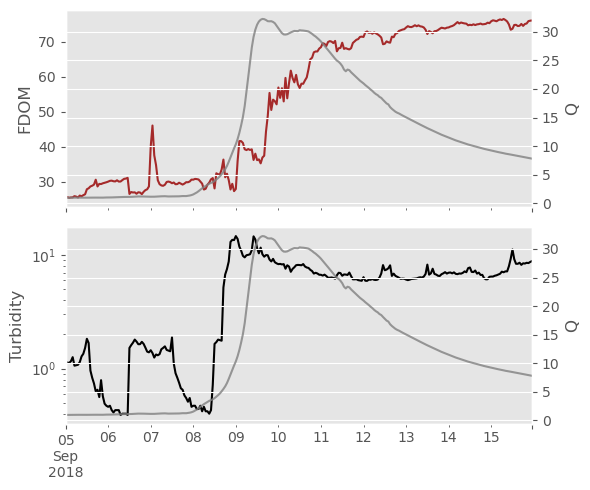

In [263]:
zoom_periods_dict = {'Storelva': ['2018-09-05', '2018-09-15',
                                  ['FDOM', 'Turbidity']],
                     'Malselva': ['2019-04-01', '2019-07-01',
                                  ['FDOM', 'Turbidity']]
                    }

figsize_dict = {'Storelva': (6, 5),
                'Malselva': (4, 3)}

li = zoom_periods_dict[site]

zoom_df = df_hourly.loc[li[0]: li[1], li[2]+['Q']]

# Time series plot
fig = plt.figure()
axs = zoom_df[li[2]].plot(subplots=True, legend=False,
                          style=['brown', 'black'], figsize=figsize_dict[site]);

for i, ax in enumerate(axs):
    ax2 = zoom_df['Q'].plot(secondary_y=True, color='grey', ax=axs[i],
                            mark_right=False, alpha=0.8)
    var = zoom_df.columns[i]

    if var == 'Turbidity':
        axs[i].set_yscale("log")

    axs[i].set_ylabel(zoom_df.columns[i])
    ax2.set_ylabel('Q')
    axs[i].set_xlabel('')

plt.tight_layout()
plt.savefig(r'../figures/timeseries_event-example_%s.png' % site)

## QC relationships

### Just the chosen events

Text(0.5, 0, 'Q')

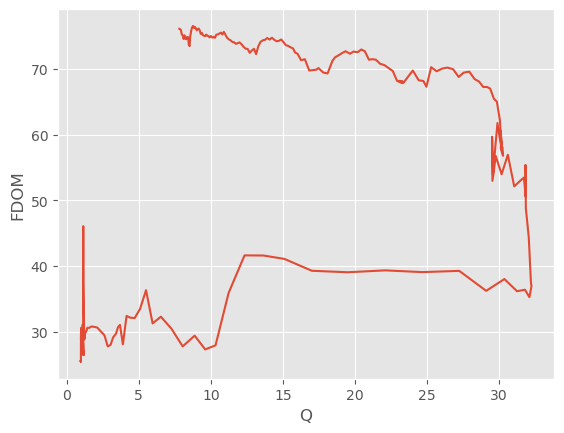

In [257]:
# QC plot (just FDOM)
ax = plt.plot(zoom_df['Q'], zoom_df['FDOM'], marker='', ms=2, linestyle='-')
plt.ylabel('FDOM')
plt.xlabel('Q')
# plt.xscale('log')

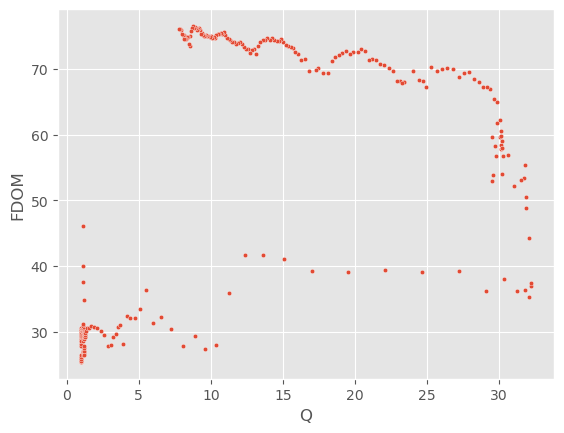

In [258]:
sns.scatterplot(x="Q", y="FDOM", data=zoom_df, s=10)
plt.savefig(r'../figures/FDOM-Q_event_%s.png' % site)

N.B. this R package looks like it could be useful: https://cran.r-project.org/web/packages/hysteresis/vignettes/index.html. Or there's also this python one: https://pypi.org/project/hysteresis/

### Whole period

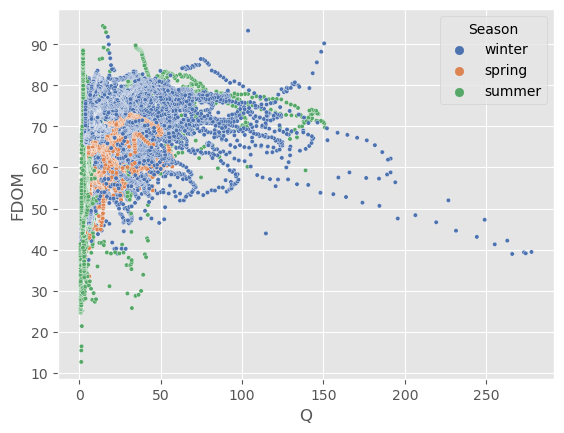

In [259]:
# Hourly data
sns.scatterplot(x="Q", y="FDOM", data=df_hourly, hue="Season", palette="deep",
                hue_order=['winter', 'spring', 'summer'], s=10)

if site == 'Malselva':
    plt.ylim(ymax=63)

plt.savefig(r'../figures/FDOM-Q_hourly_AllData_%s.png' % site)

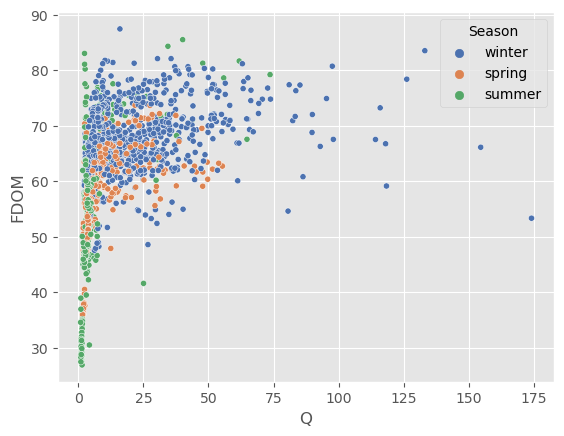

In [260]:
# Daily data
sns.scatterplot(x="Q", y="FDOM", data=df, hue="Season", palette="deep",
               hue_order = ['winter', 'spring', 'summer'], s=20)

plt.savefig(r'../figures/FDOM-Q_daily_AllData_%s.png' % site)

In [261]:
# # Different way of doing the same thing
# groups = df_hourly.groupby('Season')

# fig, ax = plt.subplots()
# for name, group in groups:
#     ax.plot(group['Q'], group['FDOM'], marker='o', linestyle='', ms=2, label=name)
# ax.legend()
# # df_hourly.plot(x='Q', y='FDOM', kind='scatter')

# To do

* Boxplots grouped by season, plus for grab samples to compare
* Split into different periods: baseflow, snow melt, summer/autumn flow events
* QC relationships for whole period vs the 3 different periods? Plots, summary stats.
* Timeseries of individual events to demonstrate value of sensor data: multi-peak freshet, late summer flow event
* Look at data frequency (grab samples) during different years.
* Fluxes over melt events for different sampling frequencyes.
* Time series of one or two multi-peak freshets, showing how sensor data gives insights into processes.
* CQ plots with grab data or with sensor data? Split by events, season,... (heading into paper territory here though)